In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
csv_file = '../../raw_data/malaria_deaths.csv'
deaths_per_100k= pd.read_csv(csv_file)

# Specify new column names as a list
new_column_names = ['entity', 'code', 'year', "deaths_per_100k_standardized"]

# Assign the new column names to the DataFrame
deaths_per_100k.columns = new_column_names

# Display the updated DataFrame with the new column names
# print(deaths_per_100k_standardized)
deaths_per_100k.head()

C:\Users\huajuan.tan.2019\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\huajuan.tan.2019\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\huajuan.tan.2019\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


,entity,code,year,deaths_per_100k_standardized
0,Afghanistan,AFG,1990,6.802930
1,Afghanistan,AFG,1991,6.973494
2,Afghanistan,AFG,1992,6.989882
3,Afghanistan,AFG,1993,7.088983
4,Afghanistan,AFG,1994,7.392472


In [2]:
# Find out how many rows and columns there are in the dataset.
deaths_per_100k.shape

(6156, 4)

In [3]:
# checking for duplications;
deaths_per_100k.nunique()

entity                           228
code                             196
year                              27
deaths_per_100k_standardized    3617
dtype: int64

In [4]:
deaths_per_100k["year"].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016], dtype=int64)

In [5]:
# check whether there're any anomalies with numerical stats;
deaths_per_100k.describe()

,year,deaths_per_100k_standardized
count,6156.000000,6156.000000
mean,2003.000000,16.375074
std,7.789514,38.606219
min,1990.000000,0.000000
25%,1996.000000,0.000000
50%,2003.000000,0.020219
75%,2010.000000,3.891035
max,2016.000000,229.228881


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000264ADCE2550>,
      dtype=object)

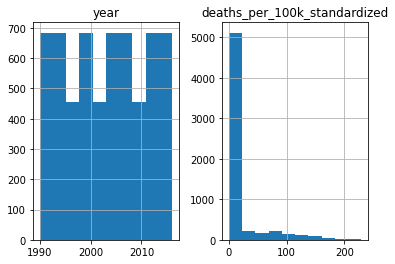

In [6]:
# command allowing matplotlib graphs to be included in the notebook, next to the code.
%matplotlib inline
# use the hist() method of matplotlib to get the histogram of all the numeric variables of the dataset
deaths_per_100k.hist()
# => noticed that deaths per 100k populated within 5k range;

In [7]:
# check for null rows& data type;
# => "code"=> exists some null values;
deaths_per_100k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   entity                        6156 non-null   object 
 1   code                          5292 non-null   object 
 2   year                          6156 non-null   int64  
 3   deaths_per_100k_standardized  6156 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 192.5+ KB


In [8]:
# Filter rows where the "code" column has null values
null_rows= deaths_per_100k[deaths_per_100k["code"].isna()]
null_rows["entity"].unique()

array(['Andean Latin America', 'Australasia', 'Caribbean', 'Central Asia',
       'Central Europe', 'Central Latin America',
       'Central Sub-Saharan Africa', 'East Asia', 'Eastern Europe',
       'Eastern Sub-Saharan Africa', 'England', 'High SDI',
       'High-income Asia Pacific', 'High-middle SDI',
       'Latin America and Caribbean', 'Low SDI', 'Low-middle SDI',
       'Middle SDI', 'North Africa and Middle East', 'North America',
       'Northern Ireland', 'Oceania', 'Scotland', 'South Asia',
       'Southeast Asia', 'Southern Latin America',
       'Southern Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Tropical Latin America', 'Wales', 'Western Europe',
       'Western Sub-Saharan Africa'], dtype=object)

In [9]:
# check that "code" is not applicable for above entities;
# => Replace the cells with "NA" in the "code" column of the filtered rows
deaths_per_100k["code"].fillna("NA", inplace=True)

In [10]:
# check that "code" col has been updated for rows with previous null "code"
deaths_per_100k[deaths_per_100k["entity"] == "Andean Latin America"].head()

,entity,code,year,deaths_per_100k_standardized
108,Andean Latin America,NA,1990,0.353560
109,Andean Latin America,NA,1991,0.349772
110,Andean Latin America,NA,1992,0.343963
111,Andean Latin America,NA,1993,0.336221
112,Andean Latin America,NA,1994,0.315883


In [11]:
# check that columns are non-null
deaths_per_100k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   entity                        6156 non-null   object 
 1   code                          6156 non-null   object 
 2   year                          6156 non-null   int64  
 3   deaths_per_100k_standardized  6156 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 192.5+ KB


In [12]:
# check columns for uniqueness; ie, no duplications;
columns_to_check = ['entity', 'code', 'year']  # Replace with your column names

# Check for duplicates based on the specified columns
duplicates = deaths_per_100k[deaths_per_100k.duplicated(subset=columns_to_check, keep=False)]

# If duplicates exist, they will be stored in the 'duplicates' DataFrame
if not duplicates.empty:
    print("Duplicate rows found:")
    print(duplicates)
else:
    print("No duplicate rows found based on the specified columns.")


No duplicate rows found based on the specified columns.


In [13]:
# deaths_per_100k.columns

In [14]:
# =================================================================

In [15]:
# Load the CSV file into a DataFrame
incidents_per_1k_at_risk= pd.read_csv('../../raw_data/malaria_inc.csv')

# Specify new column names as a list
new_column_names = ['entity', 'code', 'year', "incidents_per_1k_at_risk"]

# Assign the new column names to the DataFrame
incidents_per_1k_at_risk.columns = new_column_names

# Display the updated DataFrame with the new column names
# print(deaths_per_100k_standardized)
incidents_per_1k_at_risk.head()

,entity,code,year,incidents_per_1k_at_risk
0,Afghanistan,AFG,2000,107.100000
1,Afghanistan,AFG,2005,46.500000
2,Afghanistan,AFG,2010,23.900000
3,Afghanistan,AFG,2015,23.600000
4,Algeria,DZA,2000,0.037746


In [16]:
# Find out how many rows and columns there are in the dataset.
incidents_per_1k_at_risk.shape

(508, 4)

In [17]:
# checking for duplications;
incidents_per_1k_at_risk.nunique()


entity                      127
code                        100
year                          4
incidents_per_1k_at_risk    416
dtype: int64

In [18]:
incidents_per_1k_at_risk["year"].unique()


array([2000, 2005, 2010, 2015], dtype=int64)

In [19]:
# check whether there're any anomalies with numerical stats;
# => anomaly=> 1741** for max "incidents_per_1k_at_risk"
# => assumption**=> replace to 1000**
incidents_per_1k_at_risk.describe()

,year,incidents_per_1k_at_risk
count,508.00000,508.000000
mean,2007.50000,141.714565
std,5.59568,176.637900
min,2000.00000,0.000000
25%,2003.75000,6.986310
50%,2007.50000,57.050000
75%,2011.25000,246.050000
max,2015.00000,1741.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000264AFEA0048>,
      dtype=object)

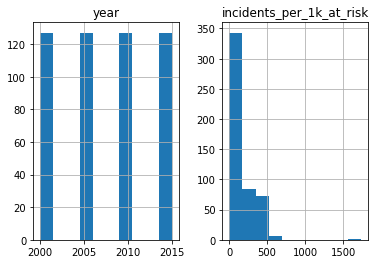

In [20]:
# command allowing matplotlib graphs to be included in the notebook, next to the code.
%matplotlib inline
# use the hist() method of matplotlib to get the histogram of all the numeric variables of the dataset
incidents_per_1k_at_risk.hist()
# noticed that no. of incidents per 1k at risk is mostly populated within 250 range;

In [21]:
# => anomaly=> 1741** for max "incidents_per_1k_at_risk"
# => assumption**=> replace to 75th percentile= 246**
greater_than_threshold = incidents_per_1k_at_risk[incidents_per_1k_at_risk["incidents_per_1k_at_risk"] > 1000]
greater_than_threshold

,entity,code,year,incidents_per_1k_at_risk
464,Turkey,TUR,2000,1741.0


In [22]:
# Check for values greater than the threshold and replace them
incidents_per_1k_at_risk.loc[incidents_per_1k_at_risk["incidents_per_1k_at_risk"] > 1000, "incidents_per_1k_at_risk"] = 246


In [23]:
# max "incidents_per_1k_at_risk"= 662=> valid**;
incidents_per_1k_at_risk.describe()

,year,incidents_per_1k_at_risk
count,508.00000,508.000000
mean,2007.50000,138.771651
std,5.59568,161.768105
min,2000.00000,0.000000
25%,2003.75000,6.986310
50%,2007.50000,57.050000
75%,2011.25000,246.000000
max,2015.00000,662.300000


In [24]:
# check for null rows& data type;
# => "code"=> exists some null values;
incidents_per_1k_at_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   entity                    508 non-null    object 
 1   code                      400 non-null    object 
 2   year                      508 non-null    int64  
 3   incidents_per_1k_at_risk  508 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 16.0+ KB


In [25]:
# Filter rows where the "code" column has null values
null_rows= incidents_per_1k_at_risk[incidents_per_1k_at_risk["code"].isna()]
null_rows["entity"].unique()
# null_rows.head()

array(['Early-demographic dividend', 'East Asia & Pacific',
       'East Asia & Pacific (IDA & IBRD)',
       'East Asia & Pacific (excluding high income)',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'IBRD only',
       'IDA & IBRD total', 'IDA blend', 'IDA only', 'IDA total',
       'Late-demographic dividend', 'Latin America & Caribbean',
       'Latin America & Caribbean (IDA & IBRD)',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle income', 'Pre-demographic dividend', 'South Asia',
       'South Asia (IDA & IBRD)', 'Sub-Saharan Africa',
       'Sub-Saharan Africa (IDA & IBRD)',
       'Sub-Saharan Africa (excluding high income)',
       'Upper middle income'], dtype=object)

In [26]:
# check that "code" is not applicable for above entities;
# => Replace the cells with "NA" in the "code" column of the filtered rows
incidents_per_1k_at_risk["code"].fillna("NA", inplace=True)

In [27]:
# check that "code" col has been updated for rows with previous null "code"
incidents_per_1k_at_risk[incidents_per_1k_at_risk["entity"] == "Upper middle income"].head()

,entity,code,year,incidents_per_1k_at_risk
472,Upper middle income,NA,2000,8.998182
473,Upper middle income,NA,2005,6.039381
474,Upper middle income,NA,2010,3.749804
475,Upper middle income,NA,2015,3.554438


In [28]:
# check that columns are non-null
incidents_per_1k_at_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   entity                    508 non-null    object 
 1   code                      508 non-null    object 
 2   year                      508 non-null    int64  
 3   incidents_per_1k_at_risk  508 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 16.0+ KB


In [29]:
# =================================================================

In [30]:
# Load the CSV file into a DataFrame
death_by_age_group= pd.read_csv('../../raw_data/malaria_deaths_age.csv', usecols=lambda column: column != 'Unnamed: 0')

# Specify new column names as a list
new_column_names = ["entity", "code", "year", "age_group", "death_count"]

# Assign the new column names to the DataFrame
death_by_age_group.columns = new_column_names

# Display the updated DataFrame with the new column names
# print(deaths_per_100k_standardized)
death_by_age_group.head()

,entity,code,year,age_group,death_count
0,Afghanistan,AFG,1990,Under 5,184.606435
1,Afghanistan,AFG,1991,Under 5,191.658193
2,Afghanistan,AFG,1992,Under 5,197.140197
3,Afghanistan,AFG,1993,Under 5,207.357753
4,Afghanistan,AFG,1994,Under 5,226.209363


In [31]:
# Find out how many rows and columns there are in the dataset.
death_by_age_group.shape

(30780, 5)

In [32]:
# checking for duplications;
death_by_age_group.nunique()

entity           228
code             196
year              27
age_group          5
death_count    17811
dtype: int64

In [33]:
death_by_age_group["year"].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016], dtype=int64)

In [34]:
death_by_age_group["age_group"].unique()

array(['Under 5', '70 or older', '5-14', '15-49', '50-69'], dtype=object)

In [35]:
# check whether there're any anomalies with numerical stats;
death_by_age_group.describe()


,year,death_count
count,30780.000000,30780.000000
mean,2003.000000,3698.550438
std,7.789007,33539.059413
min,1990.000000,0.000000
25%,1996.000000,0.000000
50%,2003.000000,0.123451
75%,2010.000000,80.505605
max,2016.000000,752025.548675


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000264AFE37358>,
      dtype=object)

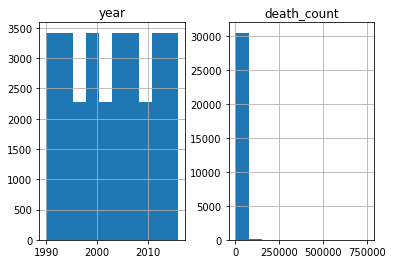

In [36]:
# command allowing matplotlib graphs to be included in the notebook, next to the code.
%matplotlib inline
# use the hist() method of matplotlib to get the histogram of all the numeric variables of the dataset
death_by_age_group.hist()

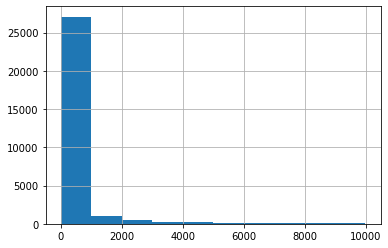

In [37]:
# review histogram for "death_count" less than 10k;
# => mainly populated within 25k range;
death_by_age_group[death_by_age_group["death_count"]< 10000]["death_count"].hist()

In [38]:
# Sort death count by descending order
# => to check whether data is logical
# => in this case; the entities with highest death counts are regional; 
# so it's logical& no cleaning is required;
death_by_age_group.sort_values(by="death_count", ascending=False).head(1000)

,entity,code,year,age_group,death_count
6061,World,OWID_WRL,2003,Under 5,752025.548675
6062,World,OWID_WRL,2004,Under 5,746365.808630
6060,World,OWID_WRL,2002,Under 5,737466.128811
6063,World,OWID_WRL,2005,Under 5,735966.857064
6064,World,OWID_WRL,2006,Under 5,734869.501103
...,...,...,...,...,...
3356,Mali,MLI,1998,Under 5,15423.059543
14824,India,IND,1991,5-14,15411.187924
2101,Ghana,GHA,2012,Under 5,15404.630707
27789,Low-middle SDI,NaN,1996,50-69,15404.303585


In [39]:
# 
death_by_age_group[death_by_age_group["death_count"] > 5000]

,entity,code,year,age_group,death_count
173,Angola,AGO,2001,Under 5,5652.300986
174,Angola,AGO,2002,Under 5,6883.451997
175,Angola,AGO,2003,Under 5,7769.447100
176,Angola,AGO,2004,Under 5,9562.814775
177,Angola,AGO,2005,Under 5,10299.012816
...,...,...,...,...,...
30694,World,OWID_WRL,2012,50-69,38591.571976
30695,World,OWID_WRL,2013,50-69,38330.804216
30696,World,OWID_WRL,2014,50-69,39074.904377
30697,World,OWID_WRL,2015,50-69,40026.639958


In [40]:
# check for null rows& data type;
# => "code"=> exists some null values;
death_by_age_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30780 entries, 0 to 30779
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   entity       30780 non-null  object 
 1   code         26460 non-null  object 
 2   year         30780 non-null  int64  
 3   age_group    30780 non-null  object 
 4   death_count  30780 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.2+ MB


In [41]:
# Filter rows where the "code" column has null values
null_rows= death_by_age_group[death_by_age_group["code"].isna()]
null_rows["entity"].unique()

array(['Andean Latin America', 'Australasia', 'Caribbean', 'Central Asia',
       'Central Europe', 'Central Latin America',
       'Central Sub-Saharan Africa', 'East Asia', 'Eastern Europe',
       'Eastern Sub-Saharan Africa', 'England', 'High SDI',
       'High-income Asia Pacific', 'High-middle SDI',
       'Latin America and Caribbean', 'Low SDI', 'Low-middle SDI',
       'Middle SDI', 'North Africa and Middle East', 'North America',
       'Northern Ireland', 'Oceania', 'Scotland', 'South Asia',
       'Southeast Asia', 'Southern Latin America',
       'Southern Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Tropical Latin America', 'Wales', 'Western Europe',
       'Western Sub-Saharan Africa'], dtype=object)

In [42]:
# check that "code" is not applicable for above entities;
# => Replace the cells with "NA" in the "code" column of the filtered rows
death_by_age_group["code"].fillna("NA", inplace=True)

In [43]:
# check that "code" col has been updated for rows with previous null "code"
death_by_age_group[death_by_age_group["entity"] == "Andean Latin America"].head()

,entity,code,year,age_group,death_count
108,Andean Latin America,NA,1990,Under 5,43.893407
109,Andean Latin America,NA,1991,Under 5,42.782675
110,Andean Latin America,NA,1992,Under 5,41.262694
111,Andean Latin America,NA,1993,Under 5,39.977449
112,Andean Latin America,NA,1994,Under 5,35.983790


In [44]:
# check that columns are non-null
death_by_age_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30780 entries, 0 to 30779
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   entity       30780 non-null  object 
 1   code         30780 non-null  object 
 2   year         30780 non-null  int64  
 3   age_group    30780 non-null  object 
 4   death_count  30780 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.2+ MB


In [45]:
# check columns for uniqueness; ie, no duplications;
columns_to_check = ['entity', 'code', 'year', 'age_group']  # Replace with your column names

# Check for duplicates based on the specified columns
duplicates = death_by_age_group[death_by_age_group.duplicated(subset=columns_to_check, keep=False)]

# If duplicates exist, they will be stored in the 'duplicates' DataFrame
if not duplicates.empty:
    print("Duplicate rows found:")
    print(duplicates)
else:
    print("No duplicate rows found based on the specified columns.")


No duplicate rows found based on the specified columns.


In [46]:
# =================================================================
# some final quality checks& potential for mapping datasets;
# =================================================================

In [47]:
# •	“malaria_deaths.csv”, and “malaria_deaths_age.csv” have the same 228 entities; 
# •	whereas, “malaria_inc.csv” has only 127 entities, with some differing entities;
# --
# although “malaria_deaths.csv”, and “malaria_deaths_age.csv” have the same entity columns, 
# I decided not to combine them as this might cause confusion since “malaria_deaths_age.csv” data is further segregated by individual age group.
deaths_per_100k["entity"].nunique()

228

In [48]:
death_by_age_group["entity"].nunique()

228

In [49]:
incidents_per_1k_at_risk["entity"].nunique()

127

In [50]:
import numpy as np
# “malaria_deaths.csv”, and “malaria_deaths_age.csv” have the same entity columns, 
np.array_equal(deaths_per_100k["entity"].unique(), death_by_age_group["entity"].unique())


True

In [51]:
# =================================================================
# ready for export;
# =================================================================
deaths_per_100k.head()

,entity,code,year,deaths_per_100k_standardized
0,Afghanistan,AFG,1990,6.802930
1,Afghanistan,AFG,1991,6.973494
2,Afghanistan,AFG,1992,6.989882
3,Afghanistan,AFG,1993,7.088983
4,Afghanistan,AFG,1994,7.392472


In [52]:
death_by_age_group.head()

,entity,code,year,age_group,death_count
0,Afghanistan,AFG,1990,Under 5,184.606435
1,Afghanistan,AFG,1991,Under 5,191.658193
2,Afghanistan,AFG,1992,Under 5,197.140197
3,Afghanistan,AFG,1993,Under 5,207.357753
4,Afghanistan,AFG,1994,Under 5,226.209363


In [53]:
incidents_per_1k_at_risk.head()

,entity,code,year,incidents_per_1k_at_risk
0,Afghanistan,AFG,2000,107.100000
1,Afghanistan,AFG,2005,46.500000
2,Afghanistan,AFG,2010,23.900000
3,Afghanistan,AFG,2015,23.600000
4,Algeria,DZA,2000,0.037746


In [54]:
# output datasets;
deaths_per_100k.to_csv('../../cleaned_data/deaths_per_100k_standardized.csv', index=False)
death_by_age_group.to_csv('../../cleaned_data/death_by_age_group.csv', index=False)
incidents_per_1k_at_risk.to_csv('../../cleaned_data/incidents_per_1k_at_risk.csv', index=False)

In [55]:
# ==

In [56]:
# =================================================================
# cleaned& processed~
# next step=> ready for Tableau** visualization;
# =================================================================
